<a href="https://colab.research.google.com/github/waltersalles/QuarentenaDadosAlura/blob/master/Desafio4alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from string import ascii_letters
import numpy as np
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(uri)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


In [3]:
len(dados)

137844

In [4]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [5]:
dados.describe()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,CO_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,...,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,CO_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q005
count,"137,844.00","137,844.00","137,844.00","137,844.00","137,843.00","132,485.00","137,844.00","137,844.00","133,140.00","133,140.00","137,844.00","137,844.00","137,844.00","86,900.00","137,844.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","36,232.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00",...,"137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,844.00","137,838.00","137,838.00","137,838.00","137,838.00","97,537.00","103,774.00","103,774.00","97,537.00","97,537.00","103,774.00","103,774.00","97,537.00","137,844.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","103,774.00","137,844.00"
mean,"180,010,423,553.31","2,018.00","3,118,377.40",31.03,22.38,0.12,2.12,1.04,"3,085,664.65",30.70,1.54,3.00,1.34,1.20,0.10,"31,587,077.66","3,160,970.21",31.45,2.31,1.03,1.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"3,119,912.84",31.05,0.71,0.75,0.75,0.71,448.51,452.52,456.51,460.50,493.63,568.31,526.59,535.18,0.53,1.10,121.73,101.70,97.18,117.03,71.50,509.13,3.90
std,"1,918,950.00",0.00,"994,483.04",9.92,7.61,0.38,1.02,0.23,"975,680.73",9.72,0.72,4.00,0.70,0.60,0.29,"9,765,074.33","979,871.51",9.77,0.78,0.18,0.12,0.03,0.01,0.02,0.02,0.00,0.04,0.02,0.03,0.01,0.01,0.01,0.02,0.03,0.02,0.03,0.00,0.00,0.04,0.01,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,"994,800.12",9.92,0.46,0.43,0.43,0.46,1.21,1.33,1.31,1.14,74.18,81.03,73.02,102.83,0.50,0.69,31.32,49.51,47.00,35.20,52.21,187.01,1.51
min,"180,007,186,686.00","2,018.00","1,100,015.00",11.00,13.00,0.00,0.00,0.00,"1,100,015.00",11.00,1.00,0.00,1.00,1.00,0.00,"11,000,058.00","1,100,015.00",11.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,100,015.00",11.00,0.00,0.00,0.00,0.00,447.00,451.00,455.00,459.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"180,008,761,760.75","2,018.00","2,409,100.00",24.00,18.00,0.00,1.00,1.00,"2,408,102.00",24.00,1.00,0.00,1.00,1.00,0.00,"24,328,308.00","2,414,407.00",24.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.

In [6]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas','linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [7]:
len(dados_notas)

97270

In [8]:
corr = dados_notas.corr()
print(corr)

                   ciencias_naturais  ciencias_humanas  ...  matematica  redacao
ciencias_naturais               1.00              0.57  ...        0.58     0.51
ciencias_humanas                0.57              1.00  ...        0.53     0.50
linguagem_codigo                0.60              0.70  ...        0.57     0.56
matematica                      0.58              0.53  ...        1.00     0.48
redacao                         0.51              0.50  ...        0.48     1.00

[5 rows x 5 columns]


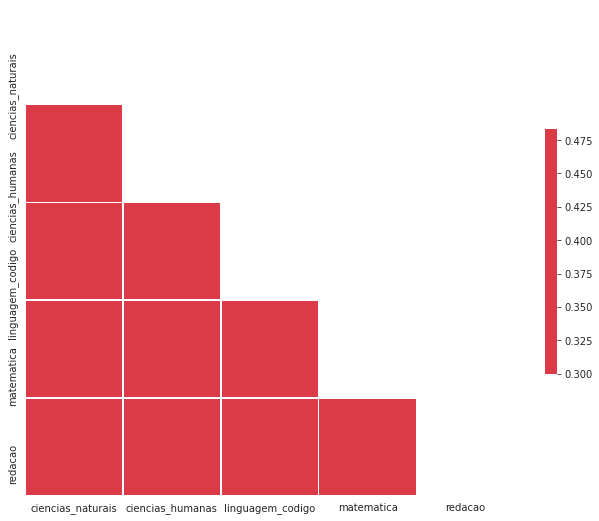

In [11]:

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

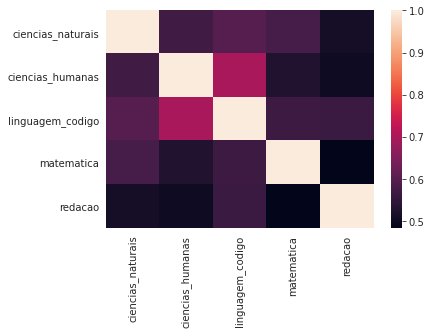

In [12]:
sns.heatmap(corr)

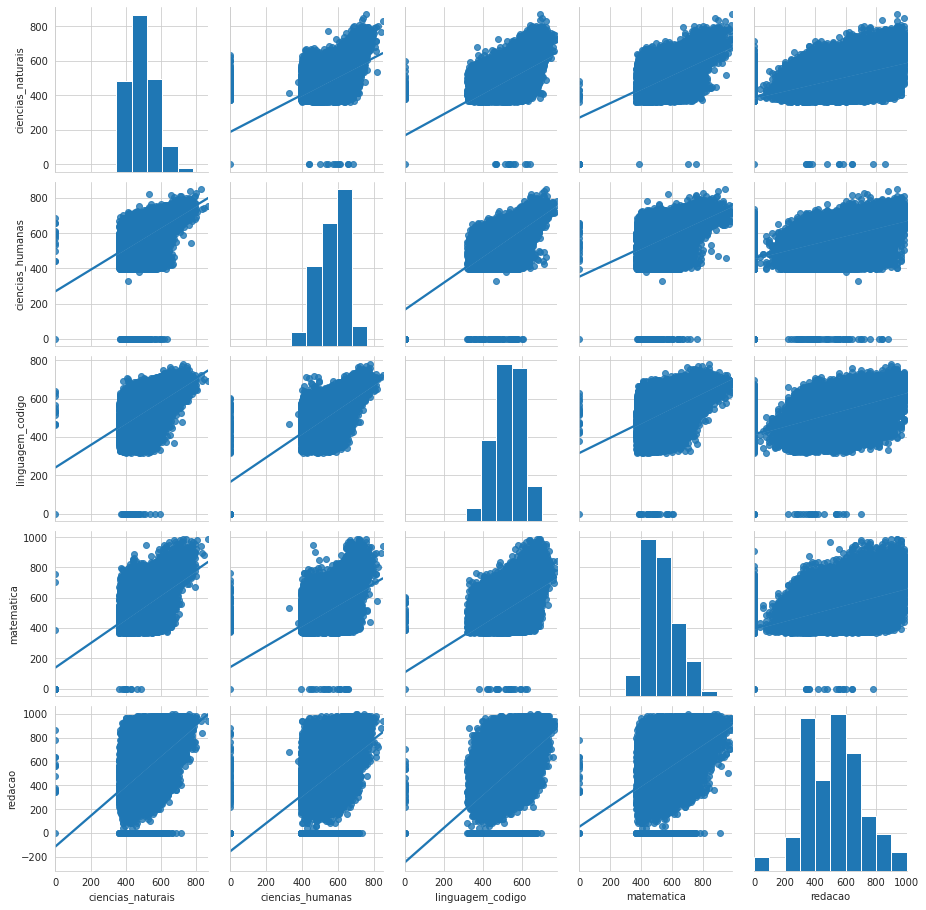

In [14]:
sns.pairplot(dados_notas, kind="reg")

In [26]:

base_de_trabalho = dados.copy()
base_presenca_com_notas = ['NU_NOTA_CN','TP_PRESENCA_CN', 'NU_NOTA_CH','TP_PRESENCA_CH', 'NU_NOTA_LC','TP_PRESENCA_LC', 'NU_NOTA_MT','TP_PRESENCA_MT', 'NU_NOTA_REDACAO']
notas_x_presenca = base_de_trabalho[base_presenca_com_notas]
notas_x_presenca.head()

,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT,NU_NOTA_REDACAO
0,nan,0.00,nan,0.00,nan,0.00,nan,0.00,nan
1,523.10,1.00,671.30,1.00,661.60,1.00,738.00,1.00,680.00
2,409.20,1.00,531.70,1.00,389.00,1.00,438.10,1.00,600.00
3,452.30,1.00,505.50,1.00,448.50,1.00,544.90,1.00,400.00
4,nan,0.00,nan,0.00,nan,0.00,nan,0.00,nan


In [27]:
notas_x_presenca = base_de_trabalho[base_presenca_com_notas]
len(notas_x_presenca)

137844

In [28]:
notas_x_presenca['TP_PRESENCA_CN'].unique()

array([ 0.,  1.,  2., nan])

In [0]:
def altera_colunas_com_loc(df, prova, nota):
  df.loc[df[f'TP_PRESENCA_{prova}'] == 0, f'NU_NOTA_{nota}'] = float(0)
  df.loc[df[f'TP_PRESENCA_{prova}'] == 2, f'NU_NOTA_{nota}'] = float(0)

In [30]:

altera_colunas_com_loc(notas_x_presenca, 'CN', 'CN')

altera_colunas_com_loc(notas_x_presenca,'CH','CH')

altera_colunas_com_loc(notas_x_presenca,'MT','MT')

altera_colunas_com_loc(notas_x_presenca,'LC','LC')

altera_colunas_com_loc(notas_x_presenca,'LC','REDACAO')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid d

In [31]:
notas_x_presenca.head(10)

,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT,NU_NOTA_REDACAO
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,523.10,1.00,671.30,1.00,661.60,1.00,738.00,1.00,680.00
2,409.20,1.00,531.70,1.00,389.00,1.00,438.10,1.00,600.00
3,452.30,1.00,505.50,1.00,448.50,1.00,544.90,1.00,400.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,428.50,1.00,505.20,1.00,521.00,1.00,436.80,1.00,560.00
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,491.80,1.00,575.70,1.00,524.40,1.00,487.60,1.00,660.00
9,568.00,1.00,650.50,1.00,633.10,1.00,587.60,1.00,520.00


In [32]:
notas_x_presenca.corr()

,NU_NOTA_CN,TP_PRESENCA_CN,NU_NOTA_CH,TP_PRESENCA_CH,NU_NOTA_LC,TP_PRESENCA_LC,NU_NOTA_MT,TP_PRESENCA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.96,0.87,0.85,0.87,0.85,0.96,0.96,0.80
TP_PRESENCA_CN,0.96,1.00,0.86,0.88,0.86,0.88,0.94,1.00,0.75
NU_NOTA_CH,0.87,0.86,1.00,0.96,0.98,0.96,0.86,0.86,0.86
TP_PRESENCA_CH,0.85,0.88,0.96,1.00,0.96,1.00,0.83,0.88,0.80
NU_NOTA_LC,0.87,0.86,0.98,0.96,1.00,0.96,0.86,0.86,0.86
TP_PRESENCA_LC,0.85,0.88,0.96,1.00,0.96,1.00,0.83,0.88,0.80
NU_NOTA_MT,0.96,0.94,0.86,0.83,0.86,0.83,1.00,0.94,0.80
TP_PRESENCA_MT,0.96,1.00,0.86,0.88,0.86,0.88,0.94,1.00,0.75
NU_NOTA_REDACAO,0.80,0.75,0.86,0.80,0.86,0.80,0.80,0.75,1.00


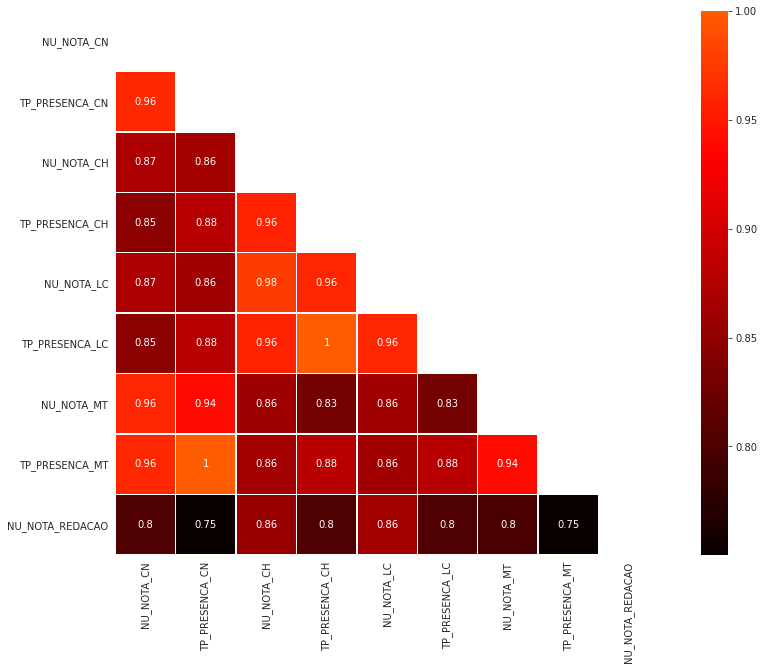

In [33]:
corr_com_presenca = notas_x_presenca.corr()
plt.figure(figsize=(15,10))
mask = np.zeros_like(corr_com_presenca)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_com_presenca, annot=True, cbar=True, center=1,linewidths=.5, cmap='hot', mask=mask, square=True)
plt.show()

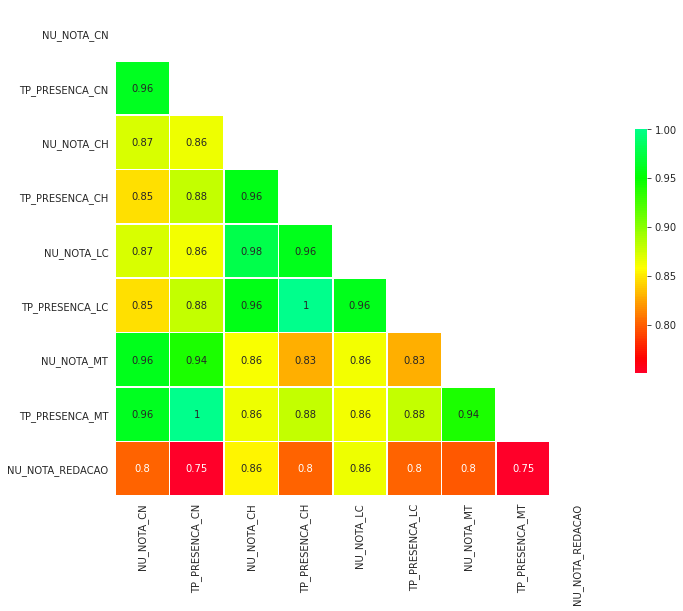

In [34]:

mask = np.triu(np.ones_like(corr_com_presenca, dtype=np.bool))


f, ax = plt.subplots(figsize=(11, 9))



sns.heatmap(corr_com_presenca, mask=mask, cmap="gist_rainbow", center=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

In [0]:
nova_base_com_zeros = base_de_trabalho.copy()

altera_colunas_com_loc(nova_base_com_zeros, 'CN', 'CN')
altera_colunas_com_loc(nova_base_com_zeros,'CH','CH')
altera_colunas_com_loc(nova_base_com_zeros,'MT','MT')
altera_colunas_com_loc(nova_base_com_zeros,'LC','LC')
altera_colunas_com_loc(nova_base_com_zeros,'LC','REDACAO')

In [0]:
respostas = nova_base_com_zeros[['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN',
 'TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT', 'NU_NOTA_REDACAO']].dropna()

In [0]:
CN_resp = respostas["TX_RESPOSTAS_CN"].values
CN_gab = respostas["TX_GABARITO_CN"].values

CH_resp = respostas["TX_RESPOSTAS_CH"].values
CH_gab = respostas["TX_GABARITO_CH"].values

LC_resp = respostas["TX_RESPOSTAS_LC"].values
LC_gab = respostas["TX_GABARITO_LC"].values

MT_resp = respostas["TX_RESPOSTAS_MT"].values
MT_gab = respostas["TX_GABARITO_MT"].values

In [39]:
def acertos(arrayR, arrayG):
  quant_acertos = []
  for c in range(len(arrayR)):
    count = 0
    for i in range(45):
      if (arrayR[c][i] == arrayG[c][i]):
        count += 1
    quant_acertos.append(count)   
  return quant_acertos   


respostas['acertos_cn'] = acertos(CN_resp, CN_gab)
respostas['acertos_ch'] = acertos(CH_resp, CH_gab)
respostas['acertos_lc'] = acertos(LC_resp, LC_gab)
respostas['acertos_mt'] = acertos(MT_resp, MT_gab)

respostas.head()

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,680.00,11,27,30,22
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.00,8,9,8,6
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.00,7,10,10,10
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.00,11,9,14,8
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.00,8,12,15,13


In [40]:
respostas['nota_cn_pura'] = (respostas['acertos_cn'] / 45)*1000
respostas['nota_ch_pura'] = (respostas['acertos_ch'] / 45)*1000
respostas['nota_lc_pura'] = (respostas['acertos_lc'] / 45)*1000
respostas['nota_mt_pura'] = (respostas['acertos_mt'] / 45)*1000
respostas.head()

,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,NU_NOTA_REDACAO,acertos_cn,acertos_ch,acertos_lc,acertos_mt,nota_cn_pura,nota_ch_pura,nota_lc_pura,nota_mt_pura
1,CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC,ADECAADBACECBEEDBEDBABEBCBACCEBCAAECCDEDABACD,CBEDB99999ECADEABEADEAACABDADACDCCBCEEBBADCDAB...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,680.00,11,27,30,22,244.44,600.00,666.67,488.89
2,AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC,AAACCCBAEBBEBEEAAEDCAAEABDEBBCDCCBADEABADBCAD,99999ABEDADDAACEBDACAEACBAAABDBABCABABABEBBEBB...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,600.00,8,9,8,6,177.78,200.00,177.78,133.33
3,BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB,DABECDAECBADCAECDDAECAEDBDDDCABDECCCAABEDADCD,AEDBB99999DDADECBBEEADABBBECAEBCCACECABBADABCD...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,400.00,7,10,10,10,155.56,222.22,222.22,222.22
6,BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB,ABBADAEAACCABAABCACBEBADCDECABCCDAECACBDDCDEB,99999EEABBDEEBAECBBACBEACBDCBDDCEBEDBDADACABCC...,CCECCBDECCEBABADBDAACEBDBBCEEACDCABAECBCABDEC,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,560.00,11,9,14,8,244.44,200.00,311.11,177.78
8,CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE,BEECACBAEECEBDEEADEDEDEBDBAACBBADBEADCBDAABEA,CBBDE99999ECAEBABACEEBCABBADAEACCCBAEABCCBCEAA...,BDCADDBCDBDBEBCEDADCEBBACECBAAEBDDBDCABECDADA,EBBEBACEDDEDDCBCCACBDDDAECAADBCEABEAEABDBCACE,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADCACEDDABEBBCBCADDACCCDEBBDAEEDBEXBCAEDABADA,660.00,8,12,15,13,177.78,266.67,333.33,288.89


In [41]:
respostas[['nota_lc_pura', 'acertos_lc']].corr()

,nota_lc_pura,acertos_lc
nota_lc_pura,1.00,1.00
acertos_lc,1.00,1.00


In [42]:
respostas[['nota_ch_pura', 'acertos_ch']].corr()

,nota_ch_pura,acertos_ch
nota_ch_pura,1.00,1.00
acertos_ch,1.00,1.00


In [43]:
  respostas[['nota_mt_pura', 'acertos_mt']].corr()

,nota_mt_pura,acertos_mt
nota_mt_pura,1.00,1.00
acertos_mt,1.00,1.00


<function matplotlib.pyplot.show>

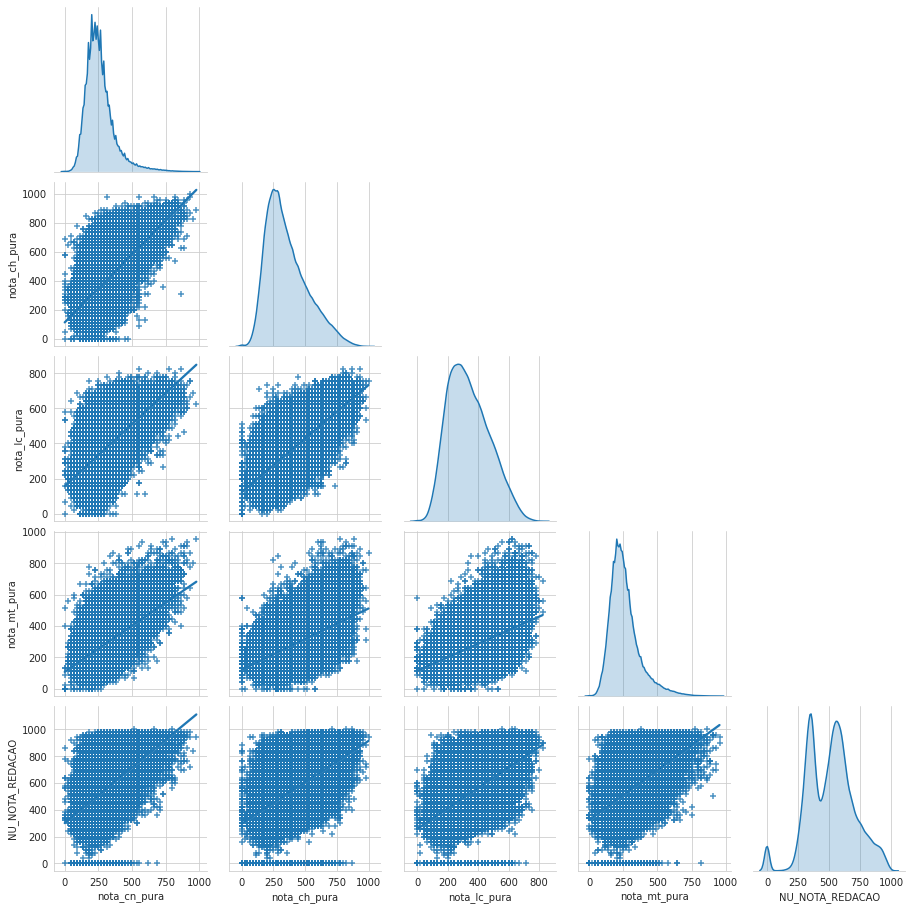

In [44]:
base_notas=respostas[["nota_cn_pura", "nota_ch_pura" ,  "nota_lc_pura" ,  "nota_mt_pura", "NU_NOTA_REDACAO"]]
sns.pairplot(data=base_notas, kind="reg", corner=True, diag_kind="kde", markers="+", dropna=True)
plt.show


In [45]:
base_notas.corr()

,nota_cn_pura,nota_ch_pura,nota_lc_pura,nota_mt_pura,NU_NOTA_REDACAO
nota_cn_pura,1.00,0.62,0.56,0.57,0.48
nota_ch_pura,0.62,1.00,0.73,0.57,0.54
nota_lc_pura,0.56,0.73,1.00,0.53,0.56
nota_mt_pura,0.57,0.57,0.53,1.00,0.44
NU_NOTA_REDACAO,0.48,0.54,0.56,0.44,1.00


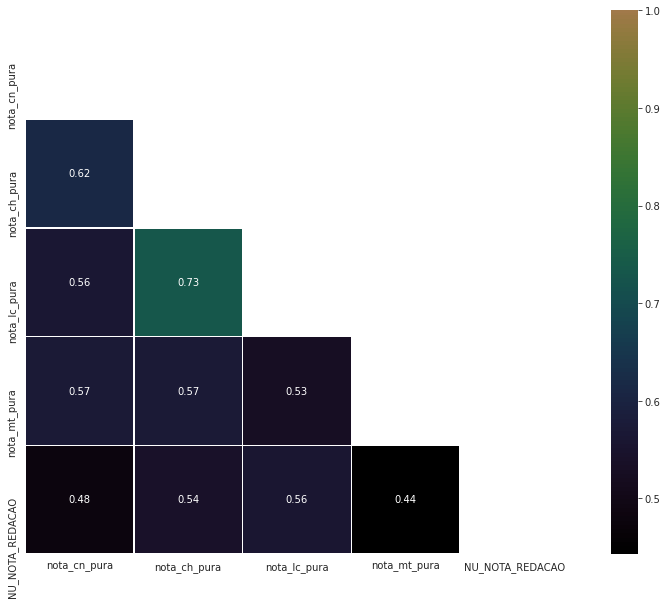

In [46]:
corr_notas = base_notas.corr()
plt.figure(figsize=(15,10))
mask = np.zeros_like(corr_notas)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_notas, annot=True, cbar=True, center=1,linewidths=.5, cmap='cubehelix', mask=mask, square=True)
plt.show()

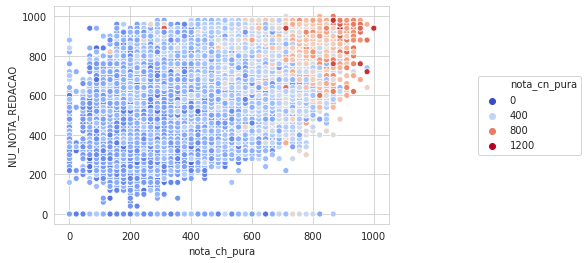

In [47]:
g = sns.scatterplot(data=respostas, x='nota_ch_pura', y='NU_NOTA_REDACAO', hue='nota_cn_pura', palette='coolwarm')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

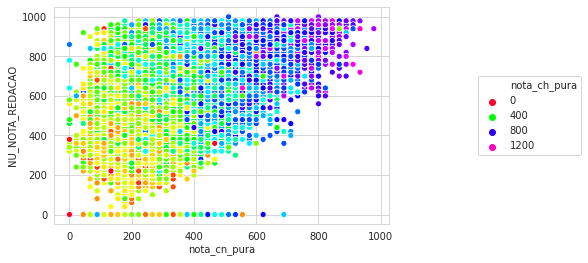

In [48]:
g = sns.scatterplot(data=respostas, x='nota_cn_pura', y='NU_NOTA_REDACAO', hue='nota_ch_pura',palette='gist_rainbow' )
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

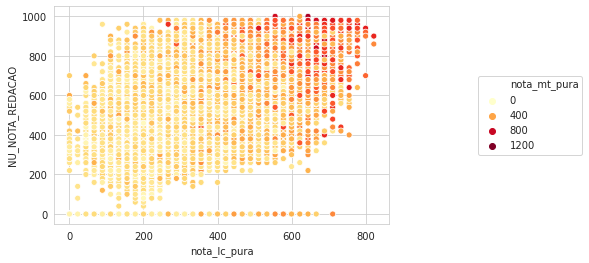

In [49]:
g = sns.scatterplot(data=respostas, x='nota_lc_pura', y='NU_NOTA_REDACAO', hue='nota_mt_pura',palette='YlOrRd' )
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

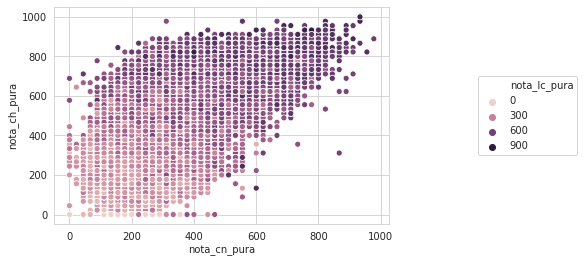

In [50]:
g = sns.scatterplot(data=respostas, x='nota_cn_pura', y='nota_ch_pura', hue='nota_lc_pura' )
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

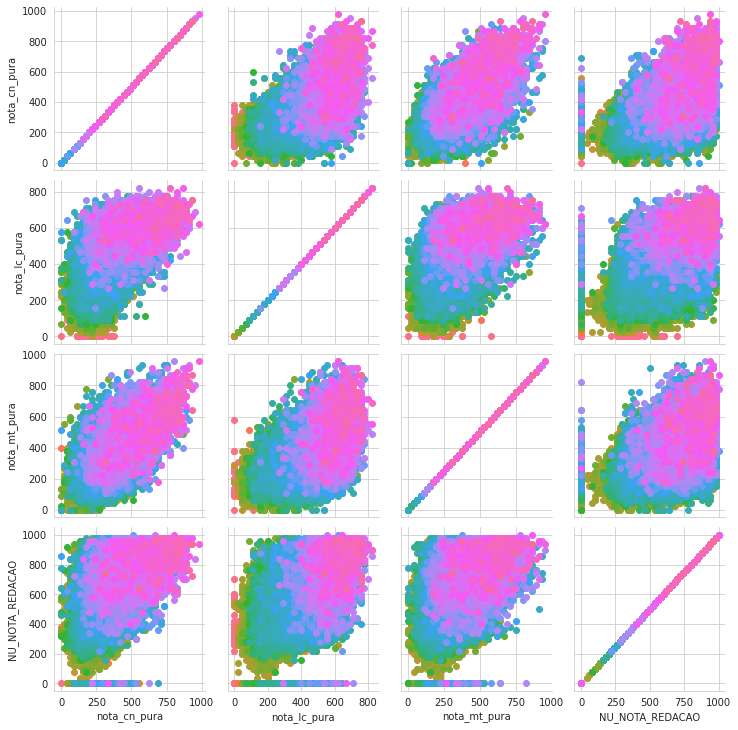

In [51]:
graph = sns.PairGrid(base_notas, hue="nota_ch_pura")
graph.map(plt.scatter)
plt.show()

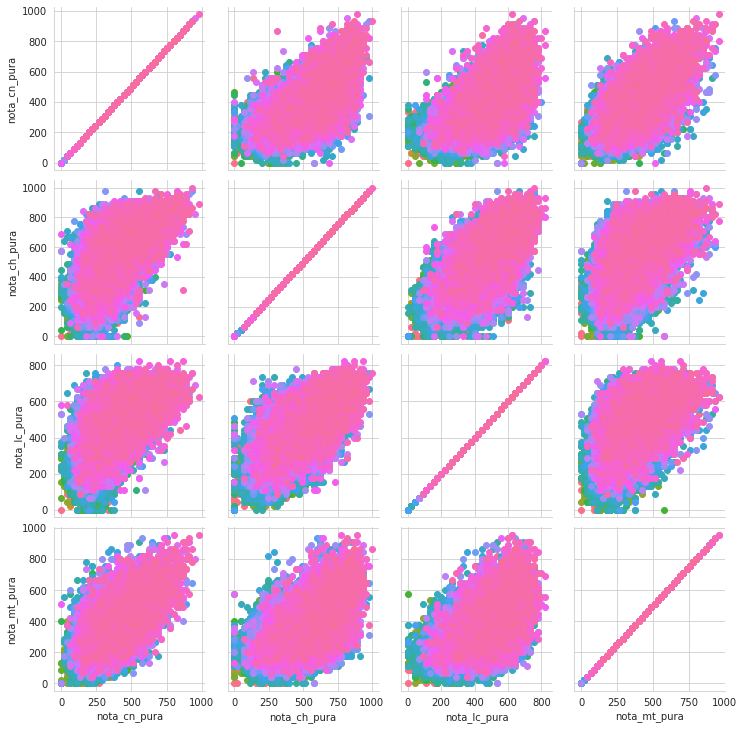

In [52]:
graph = sns.PairGrid(base_notas, hue="NU_NOTA_REDACAO")
graph.map(plt.scatter)
plt.show()

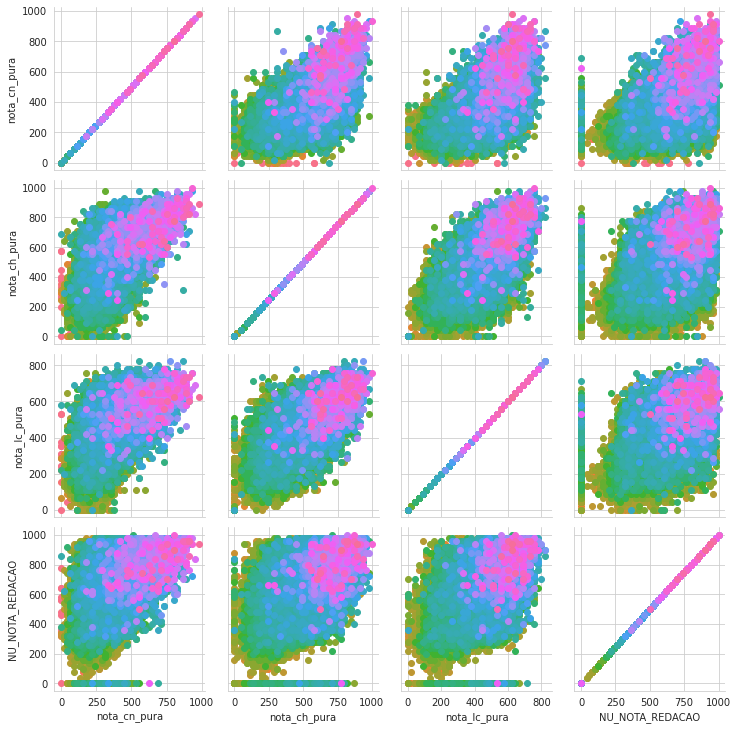

In [53]:
graph = sns.PairGrid(base_notas, hue="nota_mt_pura")
graph.map(plt.scatter)
plt.show()

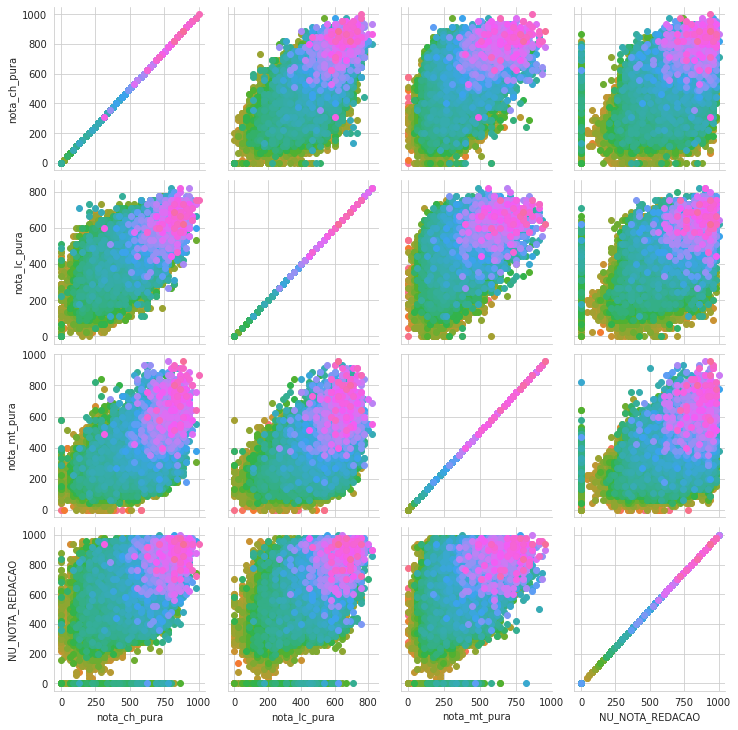

In [54]:
graph = sns.PairGrid(base_notas, hue="nota_cn_pura")
graph.map(plt.scatter)
plt.show()

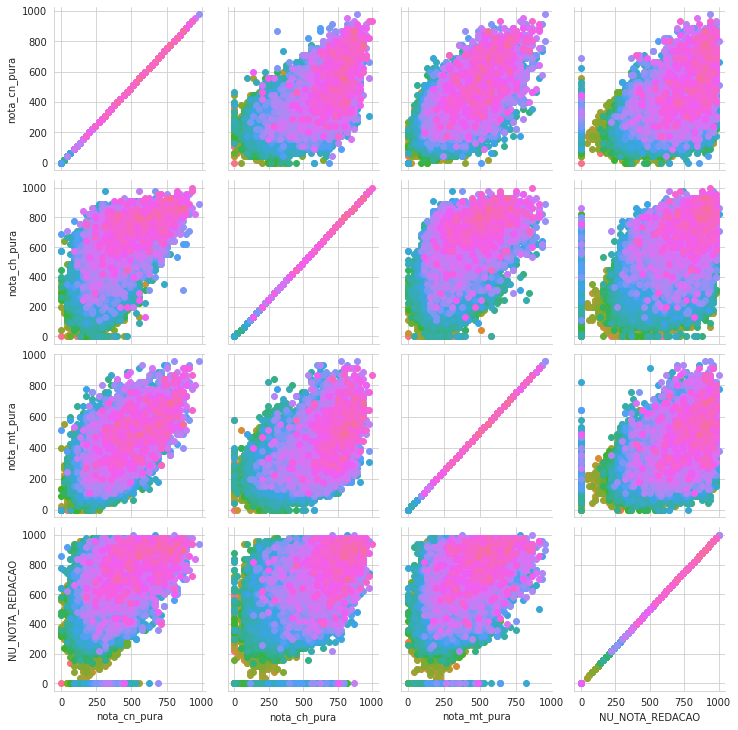

In [55]:
graph = sns.PairGrid(base_notas, hue="nota_lc_pura")
graph.map(plt.scatter)
plt.show()

In [56]:
nova_base_sem_zeros = nova_base_com_zeros.merge(respostas)
base_sem_zeros = nova_base_sem_zeros.copy()
base_sem_zeros.head()


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,acertos_cn,acertos_ch,acertos_lc,acertos_mt,nota_cn_pura,nota_ch_pura,nota_lc_pura,nota_mt_pura
0,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D,11,27,30,22,244.44,600.00,666.67,488.89
1,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E,8,9,8,6,177.78,200.00,177.78,133.33
2,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A,7,10,10,10,155.56,222.22,222.22,222.22
3,180009943059,2018,2701308,Cajueiro,27,AL,17.00,F,0.00,3,1,"2,709,400.00",Viçosa,27.00,AL,2,0,2,1.00,0,"27,026,744.00","2,701,308.00",Cajueiro,27.00,AL,2.00,1.00,1.00,0,0,0,0,0,0,0,0,0,0,0,0,...,120.00,80.00,140.00,100.00,560.00,B,B,A,F,3,B,A,B,C,A,A,B,A,A,A,A,A,A,B,B,A,C,A,A,A,B,A,11,9,14,8,244.44,200.00,311.11,177.78
4,180008290373,2018,2607307,Ipubi,26,PE,16.00,F,0.00,2,1,"2,607,307.00",Ipubi,26.00,PE,3,0,1,nan,1,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,120.00,140.00,140.00,100.00,660.00,D,D,B,B,3,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,A,B,C,D,8,12,15,13,177.78,266.67,333.33,288.89


In [0]:
respostas_sem_zeros = base_sem_zeros[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].copy()

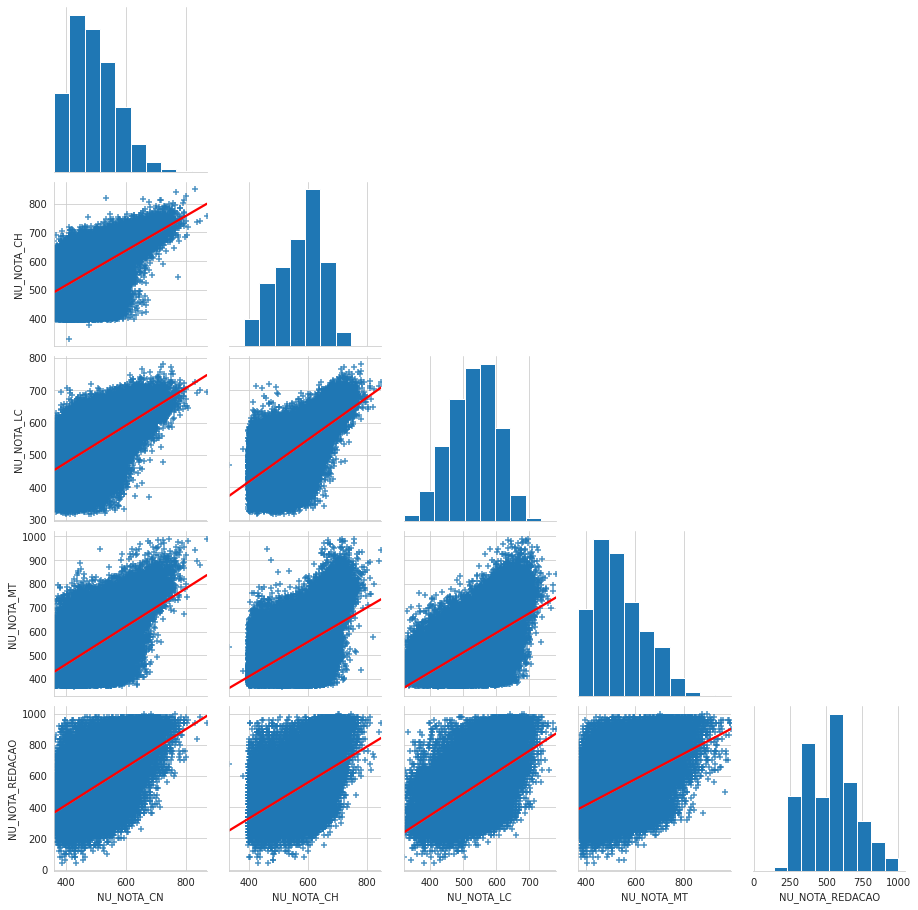

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.00,0.58,0.60,0.58,0.53
NU_NOTA_CH,0.58,1.00,0.70,0.54,0.52
NU_NOTA_LC,0.60,0.70,1.00,0.57,0.57
NU_NOTA_MT,0.58,0.54,0.57,1.00,0.50
NU_NOTA_REDACAO,0.53,0.52,0.57,0.50,1.00


In [58]:
respostas_sem_zeros = respostas_sem_zeros[~(respostas_sem_zeros == 0).any(axis=1)]

sns.pairplot(respostas_sem_zeros,
             kind='reg', plot_kws={'line_kws':{'color':'red'}},
             markers="+",
             corner=True)
plt.show()

respostas_sem_zeros.corr()

In [59]:
desc_cores = {
  "CN": {
    447: "Azul",
    448: "Amarela",
    449: "Cinza",
    450: "Rosa",
    463: "Laranja - Adaptada Ledor",
    467: "Verde - Videoprova - Libras",
    487: "Amarela (Reaplicação)",
    488: "Cinza (Reaplicação)",
    489: "Azul (Reaplicação)",
    490: "Rosa (Reaplicação)",
  },
  "CH": {
    451: "Azul",
    452: "Amarela",
    453: "Branca",
    454: "Rosa",
    464: "Laranja - Adaptada Ledor",
    468: "Verde - Videoprova - Libras",
    491: "Azul (Reaplicação)",
    492: "Amarelo (Reaplicação)",
    493: "Branco (Reaplicação)",
    494: "Rosa (Reaplicação)",
  },
  "LC": {
    455: "Azul",
    456: "Amarela",
    457: "Rosa",
    458: "Branca",
    465: "Laranja - Adaptada Ledor",
    469: "Verde - Videoprova - Libras",
    495: "Azul (Reaplicação)",
    496: "Amarelo (Reaplicação)",
    497: "Branca (Reaplicação)",
    498: "Rosa (Reaplicação)",
  },
  "MT": {
    459: "Azul",
    460: "Amarela",
    461: "Rosa",
    462: "Cinza",
    466: "Laranja - Adaptada Ledor",
    470: "Verde - Videoprova - Libras",
    499: "Amarela (Reaplicação)",
    500: "Cinza (Reaplicação)",
    501: "Azul (Reaplicação)",
    502: "Rosa (Reaplicação)",
  }
}

desc_tipos = {
    "CN": "Ciências da Natureza",
    "CH": "Ciências Humanas",
    "LC": "Linguagens e Códigos",
    "MT": "Matemática"
}

def processa_linha(linha, tipo):
  resp = linha["TX_RESPOSTAS_"+tipo]
  gab = linha["TX_GABARITO_"+tipo]
  res = dict()

  for i in range(len(resp)):
    if resp[i] == 9:
      continue
    res[i+1] = (resp[i] != gab[i]) * 1 # CHECANDO POR ERROS
  
  return pd.Series(res)

maior_indice = -1
maior_valor = -1
maior_cor = "Nenhum"
maior_tipo = "CH"

for tipo in ["CN", "CH", "MT", "LC"]:
  cores = base_sem_zeros[f"CO_PROVA_{tipo}"].unique()
  colunas_eixo_x = [str(i) for i in range(1, 46)]
  for cor in cores:
    tmp = base_sem_zeros.query(f"CO_PROVA_{tipo} == {cor}")[[f"TX_RESPOSTAS_{tipo}", f"TX_GABARITO_{tipo}"]].apply(processa_linha, args=[tipo], axis=1).sum()

    idxmax = tmp.idxmax()

    if maior_valor < tmp[idxmax]:
      maior_indice = idxmax
      maior_valor = tmp[idxmax]
      maior_cor = cor
      maior_tipo = tipo

print("Questão com mais erros: ")
print(f"Prova  : {desc_tipos[maior_tipo]} ({maior_tipo}) - {desc_cores[maior_tipo][int(maior_cor)]} ({maior_cor})")
print(f"Questão: {maior_indice} (primeira questão = 1)")
print(f"Erros  : {maior_valor}")

Questão com mais erros: 
Prova  : Matemática (MT) - Azul (459.0)
Questão: 28 (primeira questão = 1)
Erros  : 24384


In [60]:
sum(a==b for a, b in zip(respostas, gabarito))
sum(c==d for c, d in zip(a,b)) for a, b in zip(respostas, gabarito)
dados_nota_2.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'], inplace=True)

SyntaxError: ignored